# First approach on ideal modelling



1. Implementing all necessary packages

[5.00000000e-12 8.97318625e-12 1.24876768e-09]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 1.3597499 seconds ----------------
------------- Initialization and postprocessing took 0.0101891 seconds----------------


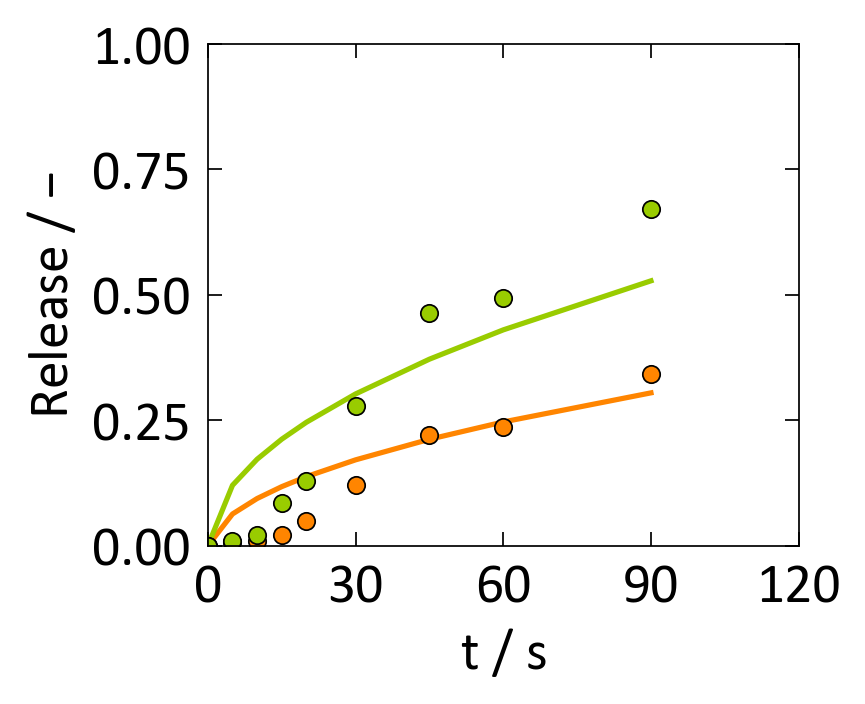

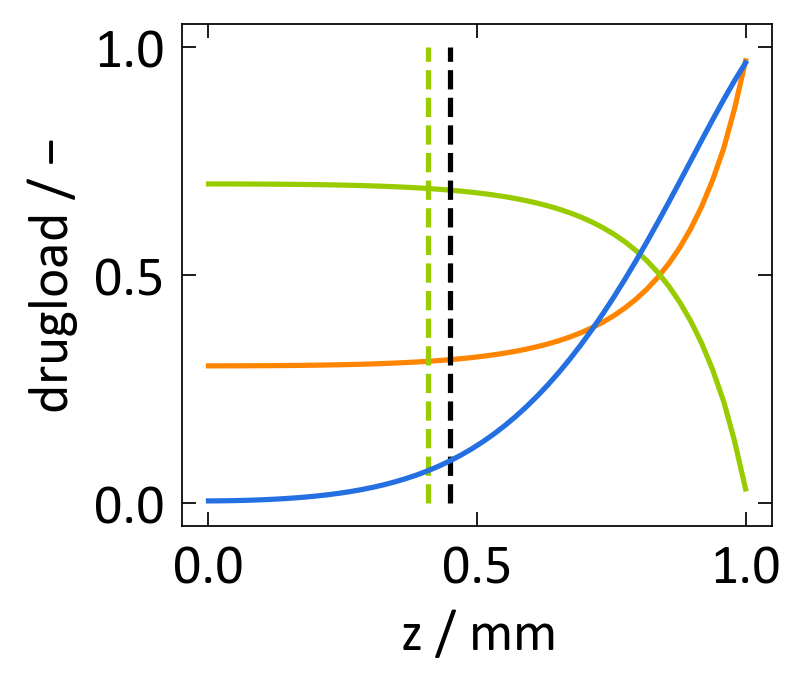

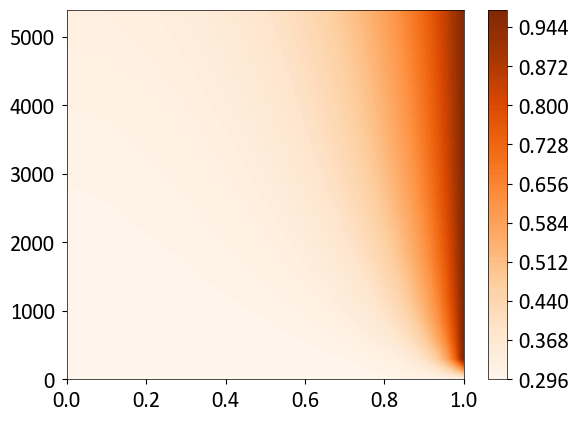

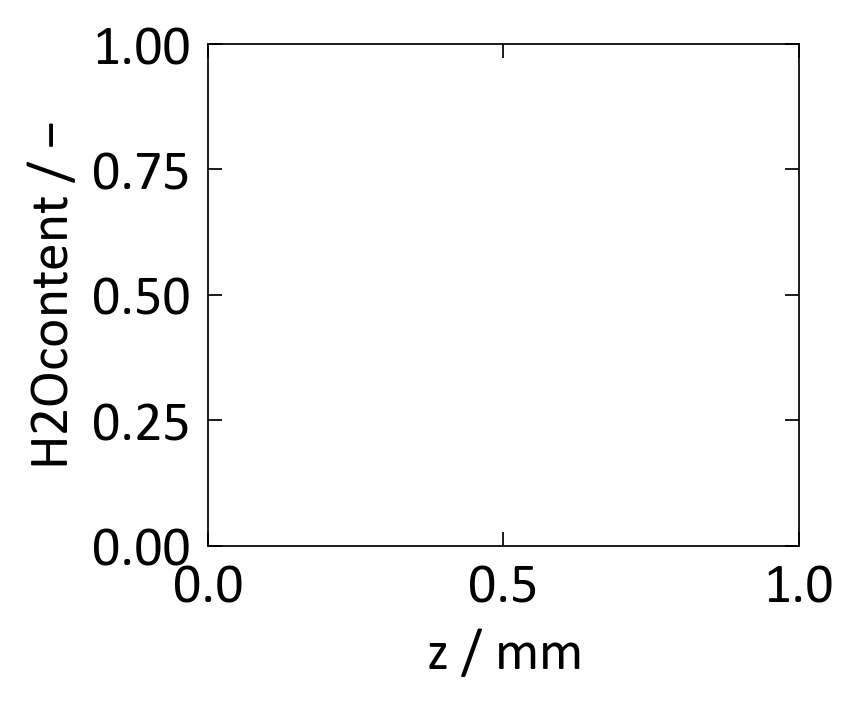

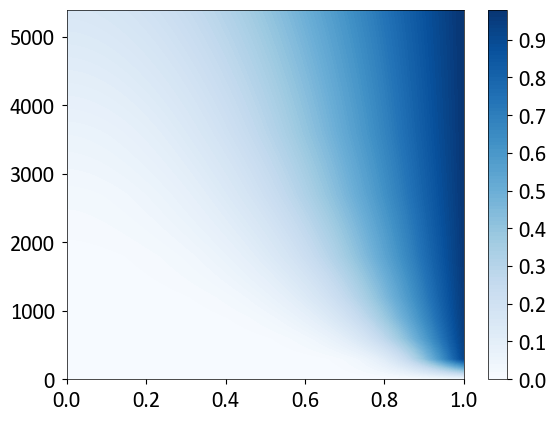

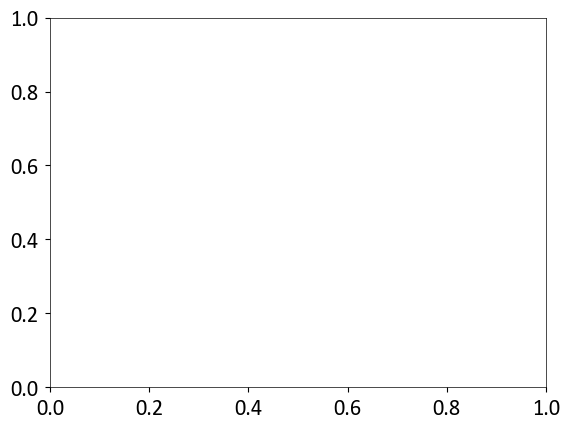

In [16]:
import numpy as np
from numpy import array
import scipy as sp
from diffusionpy import Diffusion_MS, origin_like,TgGT,dlnai_dlnxi,D_Matrix,vpure
import matplotlib.pyplot as plt
plt.rcdefaults()
from scipy.optimize import curve_fit
import xlwings as xw
import pandas as pd
Mi= np.asarray([720.948,65000,18.02])
p=1E5
T=298.15
nc=len(Mi)
kij=D_Matrix(np.asarray([0.019,-0.0605,-0.156]),nc)
par={"mi":np.asarray([15.88464728,2420.99,1.2046 ]),
"si": np.asarray([3.90027,2.947, 2.797059952]),
"ui" :np.asarray([305.787,205.27,353.95 ]),
"eAi" :np.asarray([1040.969,0.,2425.67 ]),
"kAi":np.asarray([ 0.02,0.02,0.04509 ]),
"NAi":np.asarray([4.,653., 1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi :lngi(T,wi,**par)
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,np.ascontiguousarray(wi),**par)


wINDL1D02=array([0.,18.8976378,46.45669291,55.90551181,51.96850394,64.56692913,75.59055118,97.63779528,100])/100
wPolL1D02=array([0.,12.5984252,39.37007874,54.33070866,50.39370079,62.99212598,86.61417323,98.42519685,99.21259843])/100

wINDL1D03=array([0.,0.714285714,1.,2.142857143,5.,12.14285714,22.14285714,23.57142857,34.28571429])/100
wPolL1D03=array([0.,1.,2.142857143,8.571428571,12.85714286,27.85714286,46.42857143,49.28571429,67.14285714])/100

wINDL1D04=array([0.,0,0,0,0,0.699300699,1.398601399,2.097902098,2.097902098])/100
wPolL1D04=array([0.,3.496503497,3.496503497,3.496503497,3.496503497,4.895104895,10.48951049,11.18881119,13.98601399])/100



mobile= np.asarray([True,True,True])
wi_8 =np.asarray([0.0001,0.0001,0.9998])
Dvec =np.asarray([1E-12,2E-12,8E-12])





def plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    plt.plot(texp, wAPI_ASD,'ro')
    plt.plot(texp,wPol_ASD,'go')
    # plt.plot(texp,wH2O_ASD,'bo')
    # plt.plot(texp,wges_ASD,'yo')


    
    plt.xlabel("t [s]")
    plt.ylabel("wi [-]")

def fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    def funcline(x,a,b):
        return a*x+b
    def funcquad(x,a,b,c):
        return a*x**2+b*x+c
    # popt_API, pcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*popt_API),'r-')
    # qopt_API, qcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*qopt_API),'r--')
    # popt_Pol, pcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*popt_Pol),'g-')
    # qopt_Pol, qcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*qopt_Pol),'g--')
    # popt_H2O, pcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*popt_H2O),'b-')
    # qopt_H2O, qcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*qopt_H2O),'b--')
  #  MSopt, MScov = curve_fit(Diffusion_MS,texp,wAPI_ASD)
  #  plt.plot(texp,Diffusion_MS(texp,*MSopt),'r*')
    
def Choose_ASD(ASD_L,ASD_DL):
    if  ASD_DL == 0.2:
        wIND = wINDL1D02
        w0IND = 0.2
        wPol = wPolL1D02
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.1999,0.7999,0.0002])
        texp=array([0.,5.,10.,15.,20.,30.,45.,60.,90.])*60
    elif  ASD_DL ==0.3:
        wIND = wINDL1D03
        w0IND = 0.3
        wPol = wPolL1D03
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.2999,0.6999,0.0002])
        texp=array([0.,5.,10.,15.,20.,30.,45.,60.,90.])*60
    elif ASD_DL == 0.4:
        wIND = wINDL1D04
        w0IND = 0.4
        wPol = wPolL1D04
        wH2O = 1
        mASD = 1
        wi_0 = np.asarray([0.3999,0.5999,0.0002])
        texp=array([0.,5.,10.,15.,20.,30.,45.,60.,90.])*60
    else: print("Bitte gültige Werte für Länge und Drugload eingeben")
    w0Pol = 1 - w0IND  
    L = ASD_L * 10E-4 
    

    wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD=wIND,wPol,wH2O,mASD

    t=texp
    #fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    # wt=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    # wt= Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    def fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
        def Diffforfit(t,D1,D2,D3):
            Dscale=1E13 #Hilfsvariable
            D1=50 #Dl01
            # D1=10 #Dl03
            # D1=800 #Dl05
            Dvec=np.asarray([D1,D2,D3])/Dscale #Normieren der Diffusionskoeffs (DKs)
            
            # Dvec=np.fmax(Dvec,1E-16)
            print(D1) #Ausgeben der normierten DKs
            print(D2)
            print(D3)
            wt,wtz,_,_=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile,full_output=True,nz=50)
            wt=1-wt/wt[0,:]
            return np.hstack((wt[:,0],wt[:,1])) #Rückgabe von wAPI_ASD und wPol_ASD
        wexp=np.hstack((wAPI_ASD,wPol_ASD)) #Zusammenfügen zu einem Array
        Dscale=1E13
        # qopt_H2O, qcov_H2O= curve_fit(Diffforfit,texp,wexp,bounds=(1E-4,1E6),p0=(1,1,100)) #Einsetzen von normierten DKs in Solver
        # qopt_H2O[0]=50
        # qopt_H2O[0]=10
        # qopt_H2O[0]=800
        # Dvecopt=qopt_H2O/Dscale #Zurückskalieren der optimierten DKs in Array
        Dvecopt=np.asarray([5.00000000e-13,2.97318625e-13,2.48767679e-11]) # Dl04
        Dvecopt=np.asarray([5.00000000e-12,8.97318625e-12,12.48767679e-10])# Dl03
        # Dvecopt=np.asarray([5.00000000e-12,12.48767679e-12,12.48767679e-12])*20# Dl02

        print(Dvecopt)
        

        return Dvecopt
        
        

        
    Dvecopt=  fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD) #Aufrufen der Fit- Funktion  #np.array([1E-8,1E-12,1E-8]) 
    wt,wtz,_,_=Diffusion_MS(t,L,Dvecopt,wi_0,wi_8,Mi,mobile,full_output=True,nz=50) #Aufrufen der Diffusionsgleichung mit optimierten Dks
    DL_z= wtz[:,0,:]/(wtz[:,0,:]+wtz[:,1,:])
    wwz=wtz[:,2,:]
    return wt, Dvecopt, wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,t,wtz





def Plot_Fit (ASD_L,DL):
    list1 =[]
    wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,t,wtz= Choose_ASD(ASD_L,DL)
    texp=t
    wt=1-wt/wt[0,:]
    fig10,ax10=origin_like.subplots()

    origin_like.plot(ax10,t/60,wt[:,0],"r-")
    origin_like.plot(ax10,t/60,wt[:,1],"g-")

   
    
    origin_like.set_xlabel(ax10,"t","s")
    origin_like.set_ylabel(ax10,"Release","-")
    origin_like.set_ticks(ax10,0,120,0,1)
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    origin_like.plot(ax10,texp/60, wAPI_ASD,"ro")
    origin_like.plot(ax10,texp/60,wPol_ASD,"go")
    # plt.plot(t,wt[:,0],'r-') #Plotten der angepassten Kurven
    # plt.plot(t,wt[:,1],'g-')
    # plt.plot(t,wt[:,2],'b-')



    # plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    xDL =np.linspace(0.3,0.7,3)
   # for D in xDL:
    #     wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD,DL_z= Choose_ASD(ASD_L,D)
    #     list1.append(b)
    #Dvec_array= np.array(list1)
    #fig,axis =plt.subplots()
    #axis.plot(xDL,Dvec_array[0,:],'r*')
    #axis.plot(xDL,Dvec_array[1,:],'g*')
    #axis.plot(xDL,Dvec_array[2,:],'b*')
    #wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z= Choose_ASD(ASD_L,DL)
    fig,ax =origin_like.subplots()
    fig1,ax1 =plt.subplots()
    fig2,ax2 =origin_like.subplots()
    fig3,ax3 =plt.subplots()
    fig4,ax4 =plt.subplots()
    nz=50
    z= np.linspace(0,ASD_L,nz)
    X,Z=np.meshgrid(z,t)
    # origin_like.plot(ax,z,DL_z[0,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[19,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[39,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[59,0:-1],'r-')
    origin_like.plot(ax,z,DL_z[5,0:-1],'r-')
    origin_like.plot(ax,z,1-DL_z[5,0:-1],'g-')
    Tg=TgGT(wtz[5,:,:-1],np.asarray([323.15,383.9,136]),Ki=np.asarray([0.244,0.11,1.]))
    dTg=Tg-298.15+12
    glassy=dTg>0
    rubbery=dTg<0
    firstrubbery=np.where(rubbery)[0][0]

    origin_like.plot(ax,[z[firstrubbery],z[firstrubbery]],[0,1],'g--')

    Stability=np.asarray([np.linalg.det(dlnai_dlnwi_fun(wtz[5,:,i])[:-1,:-1]) for i in range(nz-1)])
    stable=Stability>0
    instable=Stability<0
    firstinstable=np.where(instable)[0][0]
    origin_like.plot(ax,[z[firstinstable],z[firstinstable]],[0,1],'k--')
    # origin_like.plot(ax2,z,wwz[0,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[19,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[39,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[59,0:-1],'b-')
    origin_like.plot(ax,z,wwz[5,0:-1],'b-')
    # fig.savefig('filename.png', format='png', dpi='600', transparent=True)
    # ax2.plot(z,wwz[99,0:-1],'g-',label ='t = 22500s')
    
    cf=ax1.contourf(X,Z,DL_z[:,0:-1],cmap="Oranges",levels=100)
    # cp=ax1.contour(X,Z,DL_z[:,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    # cp.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    cf2=ax3.contourf(X,Z,wwz[:,0:-1],cmap="Blues",vmin=0,vmax=1,levels=100)
    # cp2=ax3.contour(X,Z,wwz[-1,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8])
    # cp2.clabel(levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8], fontsize=14,inline_spacing=0)
    # cf3=ax4.contourf(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),cmap="Greens",levels=100)
    # cp3=ax4.contour(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    # cp3.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    fig1.colorbar(cf)
    fig3.colorbar(cf2)
    # fig3.colorbar(cf3)
    origin_like.set_xlabel(ax,"z","mm")
    origin_like.set_ylabel(ax,"drugload","-")
    origin_like.set_xlabel(ax2,"z","mm")
    origin_like.set_ylabel(ax2,"H2O content","-")
    # ax.set_xlabel('z [mm]')
    # ax.set_ylabel('drugload')
    # ax.legend()
   
  

    



    
#Choose_ASD(1,0.7)
Plot_Fit (1,0.3)
#Export_to_Excel(1,0.5)
#[1.73755244e-11 1.88871822e-10 3.81394370e-10] #DL01
#[4.06467977e-11 1.24896173e-10 2.53241296e-11] #DL03
#[2.71103155e-09 3.10818932e-13 6.42293768e-14]#DL05
#[5.00000000e-11 4.50848426e-10 3.19494704e-10] #DL01
#[5.00000000e-11 1.08251374e-10 2.39069816e-11]#DL03
#[5.00000000e-11 2.71509692e-13 2.79751781e-14] #DL05


Fitting the sorption Data und Calculation of the Sorption MS Coefficients